<a href="https://colab.research.google.com/github/neildeo05/ml-notebooks/blob/master/resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Feed forward neural network - the input is 
#CIFAR10 is a database of 60000 32*32 pixel colour images in 10 classes. we can classify the with the model

import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url

from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [2]:
dataset_url = "http://files.fast.ai/data/cifar10.tgz"

download_url(dataset_url, '.')

In [3]:
#r:gz is for reading a file that has gzip compression
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path="./data")

In [4]:
data_dir = "./data/cifar10"
#training dataset
classes = (os.listdir(data_dir+"/train"))

len(os.listdir(data_dir + "/train" + "/airplane"))

root = data_dir + "/train"
dataset = ImageFolder(root, transform=ToTensor())

root_two = data_dir + "/test"
test_dataset = ImageFolder(root_two, transform=ToTensor())



classes

['horse',
 'airplane',
 'truck',
 'cat',
 'frog',
 'deer',
 'bird',
 'ship',
 'dog',
 'automobile']

In [5]:
print(dataset[0][0].shape)

torch.Size([3, 32, 32])


In [6]:
print(dir(dataset).index('classes'))

33


In [7]:
classes = dataset.classes

In [8]:
#creating a training and validation dataset:
import numpy as np

def split_indices(dataset, split_rate, seed=99):
    sr = int(split_rate*len(dataset))
    #in order to recreate the same seed with future numpy arrays
    np.random.seed(seed)
    x = np.random.permutation(len(dataset))
    return x[sr:], x[:sr]

#create indices for sampling

val_pct = 0.2
seed = 42

train_indices, val_indices = split_indices(dataset, val_pct, seed)
print(train_indices)

#now that we have set the seed it will generate the same random numbers(to reproduce the same values. It will be different with the training ds)



[39087 30893 45278 ... 38158   860 15795]


In [9]:
from torch.utils.data import SubsetRandomSampler
from torch.utils.data import DataLoader


train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

#the loader before we put it on the GPU
train_loader = DataLoader(dataset, 100, sampler=train_sampler)
val_loader = DataLoader(dataset, 100, sampler=val_sampler)

for xb, yb in train_loader:
    print(yb)
    break


tensor([6, 0, 2, 3, 5, 6, 3, 4, 3, 5, 0, 7, 1, 2, 7, 7, 4, 7, 4, 6, 9, 6, 3, 8,
        6, 6, 8, 6, 5, 3, 5, 5, 2, 7, 0, 5, 7, 5, 4, 0, 2, 1, 1, 5, 1, 8, 7, 5,
        4, 8, 0, 7, 9, 1, 4, 1, 9, 4, 8, 7, 8, 8, 8, 7, 2, 7, 4, 9, 0, 7, 8, 6,
        3, 4, 8, 7, 4, 7, 8, 4, 8, 1, 5, 5, 4, 9, 2, 5, 3, 6, 3, 5, 5, 4, 7, 9,
        2, 1, 9, 3])


In [10]:
import torch.nn as nn
import torch.nn.functional as F
class MnistModel(nn.Module):
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        hidden_quarter = int(hidden_size/4)
        hidden_half = int(hidden_size/2)
        self.linear1 = nn.Linear(in_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size,hidden_half)
        self.linear3 = nn.Linear(hidden_half, hidden_quarter)
        self.linear4 = nn.Linear(hidden_quarter, out_size)
    def forward(self, xb):
        xb = xb.view(xb.size(0), -1)
        out = self.linear1(xb)
        out = F.relu(out)
        out=self.linear2(out)
        out = F.relu(out)
        out = self.linear3(out)
        out = F.relu(out)
        out = self.linear4(out)
        return out


In [11]:
in_size = (32**2) * 3
ffmodel = MnistModel(in_size,64,10)
for xb, yb in train_loader:
    print(xb.shape)
    out = ffmodel(xb)
    loss = F.cross_entropy(out, yb)
    print(loss)
    break

def trn(num_epochs, train_dl, loss_fn, lr, model):
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    for epoch in range(num_epochs):
        for xb, yb in train_dl:
            out = model(xb)
            loss = loss_fn(out,yb)
            # print(loss)
            loss.backward()
            opt.step()
            opt.zero_grad()

    print(loss)
trn(10, train_loader, F.cross_entropy, 1e-3, ffmodel)


torch.Size([100, 3, 32, 32])
tensor(2.3041, grad_fn=<NllLossBackward>)
tensor(1.5659, grad_fn=<NllLossBackward>)


['automobile', 'horse', 'deer', 'frog', 'dog', 'deer', 'ship', 'dog', 'truck', 'dog', 'ship', 'cat', 'frog', 'ship', 'deer', 'truck', 'truck', 'bird', 'cat', 'dog', 'frog', 'bird', 'deer', 'ship', 'ship', 'deer', 'horse', 'truck', 'horse', 'automobile', 'bird', 'airplane', 'truck', 'cat', 'automobile', 'cat', 'frog', 'frog', 'dog', 'deer', 'ship', 'frog', 'airplane', 'frog', 'airplane', 'horse', 'airplane', 'automobile', 'horse', 'horse', 'bird', 'deer', 'frog', 'horse', 'cat', 'dog', 'ship', 'bird', 'bird', 'cat', 'ship', 'frog', 'dog', 'airplane', 'bird', 'bird', 'automobile', 'deer', 'deer', 'bird', 'frog', 'automobile', 'airplane', 'truck', 'automobile', 'bird', 'automobile', 'bird', 'cat', 'truck', 'bird', 'dog', 'truck', 'automobile', 'truck', 'truck', 'ship', 'dog', 'bird', 'bird', 'ship', 'bird', 'frog', 'ship', 'cat', 'cat', 'automobile', 'deer', 'bird', 'ship']


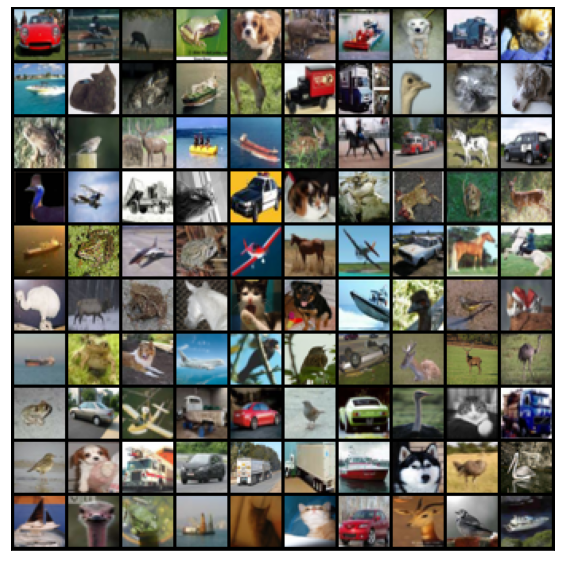

In [12]:
from torchvision.utils import make_grid

import matplotlib.pyplot as plt
items = []
def show_batch(dl):
    for images, labels in dl:
        for i in labels:
            items.append(classes[i])
        fig, ax = plt.subplots(figsize=(10,10))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:100], nrow=10).permute(1, 2, 0))

        print(items)
        break

show_batch(train_loader)

#it is mostly working in the sense that i can show the dataset


#2d convolutiuonal neural networks are simple - Kernel - matrix of weights - we will use the conv2d torch builtin for the cnn



In [13]:
import torch.nn as nn
import torch.nn.functional as F

#what conv2d does is "it applies a 2D convolution over an input signal
#composed of several input planes"

In [14]:
#Kernel of weights slides over the input, and gets an output which can fit into a matrix, then you would sum up the elements to 

#Pad the image, pixels around it -> 5x5 image returns a 5x5 output with padding

#Striding - move 2p at a time - 5x5 to 2x2 or 3x3


#Multiple channels -> (MNIST was 1 chanel) -> (Cifar10 has rgb channels) -> 1 matrix applied to red, greep and blue separately, 3 outputs, sum them together to get the output 
#matrix - Padding givers by 5x5 3 times, we add them together and we get the output matrix

#Fewer parameters - unlike fullyconnected neural networks - you have a weight that is applied to each item in the input field, we use a small set of parameters compared
#Fully connected layers have different weights for every element in the input, whereas this we can use a small set of parameters, much fewer parameters

#each output depends on a small number of input elements, whereas in full-connected outputs use all of the inputs for the output, because of the weights and the bias multiplied
#fewer gradients and matrix multiplications

#Making predictions are shared 


#if they are learning something at the etop of the image, they can apply the same learning at different parts of the image

#max pools - takes the maximum pixel from each of the sliding areas, to decrease the height and width of the output tensors from each conv layer

#after doing some padding or striding to slide around the image, you can reduce the size by doing max pooling

In [15]:
#the channel numbers gets increased, but the feature map is changed

In [16]:
#input image -> convolutional layer -> pooling layer -> convolutional layer -> pooling layer -> fully connected layer

#changing the 3 channels to 16 makes a feature map
#the feture map will slowly reduce the size

#probability that the item belongs to a certain class

#applying the weights to each value, then reducing the size of the output by collecting the maximum of the output layers after we have multiplied the weights.
#it is slowly shrunken down to the batch_size x 16, 
#then you put it through a Linear layer (fully connected) in order to get the output of 10, from the inp of 16. The weights are also applied to that as well
#(forward is calculating the output layers of the input data) and backward is the computation of the gradients and computing the changes in the gradients

#for each of the output channels there is a kernel
#if i want to add more layers, i just have to add a one layer without the maxpool, so the output will still be optimized based on the kernel
model = nn.Sequential(
    nn.Conv2d(3,16,kernel_size=3, stride=1, padding=1), 
    nn.ReLU(), 
    nn.MaxPool2d(2,2),  #output: batch_size * 16 x  16 x 16

    nn.Conv2d(16,16, kernel_size = 3, stride=1, padding=1), 
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output: batch_size * 16 x 8 x 8



    nn.Conv2d(16,16,kernel_size = 3, stride=1, padding=1),
    nn.ReLU(),

    nn.Conv2d(16,16, kernel_size = 3, stride=1, padding=1), 
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output: batch_size x 16 x 4 x 4

    nn.Conv2d(16,16, kernel_size = 3, stride=1, padding=1), 
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    #if we add one more convolutional layer without the maxpool2d, we can add a layer without reducing the size of the output tensor
    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),


    nn.Conv2d(16,16, kernel_size = 3, stride=1, padding=1), 
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    nn.Flatten(), #it is now a vector
    nn.Linear(16,10) #outputs the 10 probabilities 
)

#max pooling is not the best becasue you are throwing away the data

#Steps: Have an image with a acertain height width, channel number and amount of pixels. Increase the channel number to create a feature map.


# There are two main reasons for this [increase the channel number]:

# As you apply pooling, your data gets smaller and you can afford to have more channels, keeping the same amount of information but making it more relevant to your problem.
# Deeper layers have larger receptive fields and generally correspond to more specific features. 
# Early layers learn things like lines while later layers learn much more complex features like faces.
# There are going to be a lot more of those complex features than there are simple features, so you want more channels to capture them all.

#more channels if you want your model to recognize the complex feratures.
#then, you have to pass through the kernel to get an output matrix, of the same size, run max pool to reduce the size of the output matrix, then do that again and again until you
#have a channel(landform definition) size * 1 * 1. Then you can reshape or unsqueeze the current output matrix until you have a vector of size 16. then you pass the vector into the
#feed forward layer, and then you get the 10 outputs - which are the probabilities of the 10 classes


#the maxpool2d is responsible for making the output tensor smaller.

#remember that there are weights and biases that are responsible for the predictions of the model itself. instead of having one tensor fof weights/biases that are applied to one single
#item in the input tensor, CNN's have a kernel of weights that gets reused for every single item in the matrix.

#So instead of optimizing every single item in the weights matrix, we optimize the kernel for every 

In [17]:
for images, labels in train_loader:
    print(images.shape)
    out = model(images)
    #input is 100 images(per batch), and the output is the 10 probabilities, that we have not optimized yet
    print(out.shape)
    print(F.softmax(out[0]))
    #we want to think of them as probabilities
    break

torch.Size([100, 3, 32, 32])
torch.Size([100, 10])
tensor([0.0790, 0.0996, 0.1134, 0.0747, 0.0890, 0.1135, 0.0745, 0.1187, 0.1157,
        0.1219], grad_fn=<SoftmaxBackward>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [18]:
#put the model and the data to the gpu
#the gpu makes it faster to train the model
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    return torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

In [19]:
#whenever we are loading a batch of data, that is when we are in fact putting the data in the GPU

device = get_default_device()
print(device)

train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(val_loader, device)



cuda


In [20]:
def accuracy(output, label):
    _,preds = torch.max(output, dim=1)
    return torch.sum(preds == label).item()/len(label)


In [21]:
def loss_batch(model, loss_fn, xb, yb, opt):
    #pass in the image to the model and get the intial predictions
    preds = model(xb)

    #calculate the loss in order to optimize the model
    loss = loss_fn(preds, yb)
    acc = accuracy(preds, yb)
    print(acc)
    #calculate the gradients with a backwards pass
    #The "forward pass" refers to calculation process, values of the output layers from the inputs data. It's traversing through all neurons from first to last layer.
    # A loss function is calculated from the output values.
    # And then "backward pass" refers to process of counting changes in weights (de facto learning), using gradient descent algorithm (or similar). Computation is made from last layer, backward to the first layer.
    loss.backward()
    opt.step()
    #update the values of the optimizer
    opt.zero_grad()
    #set the gradient values in the optimizer back to 0

In [22]:
def train(model, train_loader, lr, loss_fn, num_epochs):
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    for epoch in range(num_epochs):
        model.train()
        for xb,yb in train_loader:
            loss_batch(model, loss_fn, xb, yb, opt)

In [23]:
#move the model to the GPU
model = to_device(model, device)
train(model, train_dl, 1e-3, F.cross_entropy, 10)

0.09
0.09
0.1
0.06
0.11
0.12
0.1
0.04
0.07
0.05
0.14
0.12
0.13
0.18
0.15
0.08
0.12
0.08
0.14
0.13
0.06
0.12
0.07
0.06
0.07
0.09
0.08
0.15
0.06
0.11
0.19
0.17
0.05
0.13
0.11
0.06
0.11
0.09
0.08
0.1
0.09
0.07
0.05
0.04
0.11
0.11
0.09
0.09
0.08
0.05
0.16
0.1
0.09
0.18
0.07
0.13
0.23
0.11
0.13
0.08
0.1
0.07
0.13
0.1
0.11
0.07
0.12
0.08
0.09
0.1
0.21
0.11
0.11
0.08
0.07
0.11
0.08
0.13
0.08
0.07
0.19
0.15
0.13
0.17
0.14
0.11
0.08
0.07
0.12
0.14
0.1
0.11
0.1
0.06
0.14
0.12
0.15
0.14
0.15
0.18
0.14
0.14
0.17
0.15
0.25
0.1
0.09
0.16
0.12
0.19
0.15
0.22
0.17
0.16
0.13
0.17
0.23
0.19
0.12
0.16
0.16
0.12
0.16
0.12
0.17
0.16
0.11
0.21
0.13
0.18
0.16
0.2
0.19
0.14
0.2
0.11
0.15
0.16
0.24
0.19
0.24
0.13
0.21
0.19
0.2
0.15
0.18
0.24
0.25
0.19
0.21
0.18
0.27
0.23
0.2
0.28
0.22
0.19
0.19
0.23
0.15
0.25
0.16
0.19
0.2
0.2
0.24
0.21
0.24
0.22
0.29
0.2
0.26
0.19
0.24
0.2
0.16
0.23
0.26
0.2
0.18
0.3
0.21
0.23
0.19
0.22
0.26
0.25
0.26
0.24
0.23
0.23
0.19
0.31
0.3
0.22
0.19
0.23
0.28
0.33
0.32
0.35
0.28
0.28
0

In [24]:
acc_arr = []
for xb, yb in val_dl:
    out = (model(xb))
    loss = F.cross_entropy(out, yb)
    print(loss)
    acc = accuracy(out,yb)
    acc_arr.append(acc)

print(sum(acc_arr)/len(acc_arr))

    #ehh 54% accuracy is hot garbaginhos but its better than nothing. when we use the rnn, it would get better. A lot better hopefully
    #woah now it is even lower at just about 50%
    #initial is 9% accuracy 


tensor(1.3863, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.2654, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.3977, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.2737, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.2928, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.3986, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.0732, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.3914, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.4201, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.2800, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.2557, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.2262, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.3155, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.2808, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.4191, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.2992, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.3404, device='cuda:0', grad_fn=<NllLossBackward

In [25]:
#Adam optimizer - changes the learning rate, whereas SGD keeps it the same
#if you try and train for a lot more epochs your training loss will go down, but your validation loss with in fact go up
#this is a bad bad bad thing, because when the model starts to memorize a certain datasets, thats when you know that you have to train all over again.

#to avound overfitting, you need to gather and generate more training data, and add more noise to it - 

#or by agumenting the data, or getting more training samples. However this can be difficult when you are given a dataset, but it could work if you are the one who is collecting data

# or you can use regularization techniques like batch normalization and dropout
#stop the model's training early, right when the validation loss starts to increase
#(stop early, reduce the learning rate, to see if the lower learning rate is reducing overfitting)


#we will try and improve the thing to 90% acc

In [26]:
#test_dataset
test_ds = ImageFolder(data_dir+"/test", transform=ToTensor())

print(test_ds[9999])

(tensor([[[1.0000, 0.9765, 0.9569,  ..., 0.8980, 0.8902, 0.9098],
         [0.9333, 0.8980, 0.8902,  ..., 0.8902, 0.8863, 0.9176],
         [0.9333, 0.9255, 0.9412,  ..., 0.8941, 0.8941, 0.9373],
         ...,
         [0.3098, 0.2824, 0.2980,  ..., 0.3176, 0.2941, 0.2510],
         [0.3529, 0.3569, 0.3451,  ..., 0.3412, 0.3373, 0.3333],
         [0.3843, 0.3804, 0.3647,  ..., 0.3686, 0.3765, 0.3804]],

        [[1.0000, 0.9765, 0.9569,  ..., 0.9294, 0.9216, 0.9255],
         [0.9333, 0.8980, 0.8902,  ..., 0.9294, 0.9216, 0.9333],
         [0.9333, 0.9255, 0.9412,  ..., 0.9333, 0.9216, 0.9451],
         ...,
         [0.3137, 0.3020, 0.3333,  ..., 0.3059, 0.2941, 0.2510],
         [0.3608, 0.3686, 0.3686,  ..., 0.3412, 0.3373, 0.3333],
         [0.3882, 0.3922, 0.3765,  ..., 0.3725, 0.3804, 0.3804]],

        [[0.9922, 0.9686, 0.9490,  ..., 0.9059, 0.9059, 0.9176],
         [0.9255, 0.8902, 0.8824,  ..., 0.9059, 0.9020, 0.9216],
         [0.9255, 0.9176, 0.9333,  ..., 0.9137, 0.9059, 0

In [27]:
def predict(model, image):
    #unsqueeze adds an extra dimension to the tensor
    image = image.unsqueeze(0)
    img = to_device(image, torch.device("cuda"))
    out = model(img)
    _,preds = torch.max(out, dim=1)
    return (classes[preds[0].item()], classes[label], classes[preds[0].item()] == classes[label])


comp predicted : cat
answer was : airplane
it was:  False


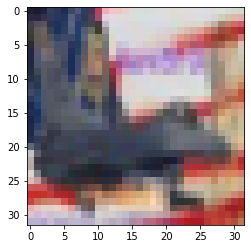

In [28]:
img, label = test_ds[20]
comp, ans, trfl = predict(model,img)
print("comp predicted :", comp)
print("answer was :", ans)
print("it was: ", trfl)
plt.imshow(img.permute(1,2,0))

In [29]:
#making the image classifier to 90% using a resnet -> 
#right now it is at 55% accuracy, and we will improve it

#train the image classifier to over 90% accuracy in less than 10 minutes

#55% - 90% with (data normailzation, data augmentation, residual connections, batch normalization, learning rate annealing, weight decay, gradient clipping)

In [30]:
#i will try each of the techniques separately

#Instead of setting aside a fraction od the data from the training set for validation, we'll simply use the test swet as our validation set. This gives us more data
#in general you should not do this. this is kinda the last resort if you are training the model on a different dataset.

#we will normalize the image tensors by subtracting the mean and dividing by the standard deviation accross each channel. As a result, the mean of the data across each channel is 0
#and the standard deviation is 1. Normalizing the data, prevents values from any one channel from disproportionately affecting the losses and gradinets while training, simply
#by having a higher or wider range of values than the others

#We will apply randomly chosen transformations while loading images from the training dataset. Specifically, we will pad each image by 4 pizels, and then take a random crop of size
#32x32 and then flip the image horizontally with a 50% probability. Since the transformation will be applied randomly and dynamically, each time a particular image is loaded, the 
#Model sees slightly different images in each epoch of training, which allows it to generalize better
#this reduces overfitting, by adding some noise to the dataset. When you add noise to the training dataset, it avoids overfitting
#R  G  B

#apply convolution to each channel, and then sum up the answers as our prediction. For example. If there is a wide range of reds in a dataset, then there will be a big change in the
#values for the reds, whereas the greens are very low in the range, but vary a lot. When you train the model, this variation gets drowned, as the reds are much bigger in variation


#take means for red, green ,blue, and divide by the standard deviations for the rgb layers for the image

#have been calculated on the dataset. You have to find the mean for all of the red pixels, blue pixels, and green pixels. And then you have to calc the stdev by:
# Work out the Mean of each color layer
# Then for each number in each layer: subtract the Mean and square the result
# Then work out the mean of those squared differences for every pixel in the layer
# Take the square root

#how much each pixel on average deviates from the mean


#predict - if we were to apply a cnn to the MNIST dataset, would the accuracy be higher or lower? 

import torchvision.transforms as tt
stats = ((0.4914,0.4822,0.4465), (0.2023, 0.1994,0.2010))

#we will use reflection padding rather than black padding, mirroring part of the image to pad the image


#now we will create the transforms that would be applied to our data

train_transforms = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'), tt.RandomHorizontalFlip(), tt.ToTensor(), tt.Normalize(*stats)])

valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])


In [31]:
train_ds = ImageFolder(data_dir+'/train', train_transforms)
valid_ds = ImageFolder(data_dir+'/test', valid_tfms)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])
torch.Size([32, 32, 3])


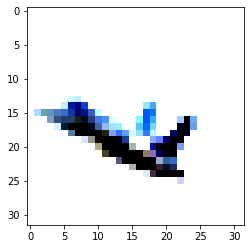

In [32]:
img = train_ds[0][0]
img2 = dataset[0][0]
print(img.shape)
xz = img.permute(1,2,0)
print(xz.shape)
xy = img2.permute(1,2,0)

plt.imshow(xz)

# plt.imshow(xy)

#now, the image has been transofrmed, and the rgb layers have been normalized

#hmm that looks very weird now that we have applied the transforms to it eh? we have normalized each layer so thats why the color seems to be off

In [33]:
#create the data loader
#num workers - use up to 8 cpu cores to load the data, makes sure that there is no repeated memory allocation for the data
train_dl = DataLoader(train_ds, 256, shuffle=True, num_workers=8, pin_memory=True)
valid_dl = DataLoader(train_ds, 256, shuffle=True, num_workers=8, pin_memory=True)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['automobile', 'horse', 'deer', 'frog', 'dog', 'deer', 'ship', 'dog', 'truck', 'dog', 'ship', 'cat', 'frog', 'ship', 'deer', 'truck', 'truck', 'bird', 'cat', 'dog', 'frog', 'bird', 'deer', 'ship', 'ship', 'deer', 'horse', 'truck', 'horse', 'automobile', 'bird', 'airplane', 'truck', 'cat', 'automobile', 'cat', 'frog', 'frog', 'dog', 'deer', 'ship', 'frog', 'airplane', 'frog', 'airplane', 'horse', 'airplane', 'automobile', 'horse', 'horse', 'bird', 'deer', 'frog', 'horse', 'cat', 'dog', 'ship', 'bird', 'bird', 'cat', 'ship', 'frog', 'dog', 'airplane', 'bird', 'bird', 'automobile', 'deer', 'deer', 'bird', 'frog', 'automobile', 'airplane', 'truck', 'automobile', 'bird', 'automobile', 'bird', 'cat', 'truck', 'bird', 'dog', 'truck', 'automobile', 'truck', 'truck', 'ship', 'dog', 'bird', 'bird', 'ship', 'bird', 'frog', 'ship', 'cat', 'cat', 'automobile', 'deer', 'bird', 'ship', 'airplane', 'truck', 'frog', 'dog', 'dog', 'airplane', 'frog', 'ship', 'frog', 'ship', 'dog', 'horse', 'airplane', '

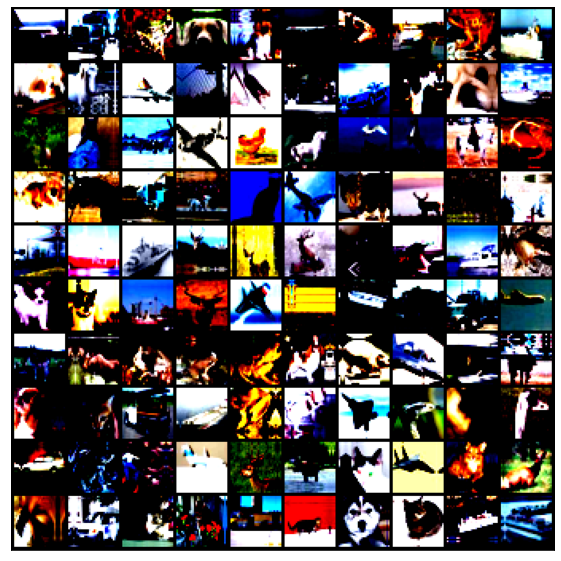

In [34]:
show_batch(train_dl)
#ngl that makes my eyes hurrrrrrt


#the transofmrations have been applied, and the layers have been normalized

In [35]:
#reflection padding makes the output image quite realistic

In [36]:
#we will use the model WideResNet22

#simple resnet

class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        #in order to add the input to the output, you need the input channels and the output channels to stay the same
        self.conv1 = nn.Conv2d(3,3,kernel_size=3,stride=1,padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(3,3,kernel_size=3,stride=1,padding=1)
        self.relu2 = nn.ReLU()

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out+x)



In [37]:
simple_resnet = SimpleResidualBlock()
smprsn = DeviceDataLoader(simple_resnet, torch.device("cuda"))
for images, labels in train_dl:
    out = simple_resnet(images)
    print(out.shape)


torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([256, 3, 32, 32])
torch.Size([25

In [38]:
#output has the same shape. Instead the layers 

#inside the batch normalization layer, there are a couple of parameters, mean and std these parameters are getting learned each time

#WideResNet22 - Inp image, pass it into a 3x3 kernel which takes 3 channels to 16 chanels, 

#then we have 3 groups which have 3 residual blocks. In each block, we perform batch normalization, then we do the activation function (ReLU), then we go from 16 channels to 96 channels

#the wide resnet has a fanout factor of 6. 

#batch norm - relu - conv layer - batch norm - relu - conv layer - 

#a 1x1 convolutional layer is used to change the layer size. Usually it increases the layer size, because in resnets the layer size needs to stay the same

#sometimes the resnet skips the convolutional layer entirely. IDK why and idk why it is good. the teacher that is teaching me this kinda sucks ass

#each channel can learn something new about the image.

#this is why you go from a 3x3 rgb to a 16 feature map

#only way to make the model more powerful, is to increase the number of channels in each layer

# if you are doing a stride of 2 you jump 2 pixels for each stride, it cuts the size of the feature map, instead of doing a maxpool2d

#then the output gets normalized, passed throuh a relu, adaptive average pooling, avg pool on a feature map so that the output becomes the layers x 1 x 1. This is important so we can
# then pass it through a feature map. Then we perform a softmax, and then get the probabilities

In [39]:
def conv_2d(num_inps, num_features,stride = 1, ks = 3):
    return nn.Conv2d(num_inps, num_features, kernel_size = ks, stride=stride, padding=ks//2, bias=False)

In [40]:
def bn_relu_conv(num_inps, num_features):
    return nn.Sequential(nn.BatchNorm2d(num_inps), nn.ReLU(inplace=True), conv_2d(num_inps, num_features))

In [41]:
# class ResidualBlock(nn.Module):
#     def __init__(self, num_inps, num_feats, stride = 1):
#         super().__init__()
#         self.batchnorm = nn.BatchNorm2d(num_inps)
#         self.conv1 = conv_2d(num_inps, num_feats)
#         self.conv2 = bn_relu_conv(num_feats, num_feats)
#         self.shortcut = lambda x: x
#         if num_inps != num_feats:
#             self.shortcut = conv_2d(num_inps, num_feats, stride=stride, ks=1)

#     def forward(self, x):
#         x = F.relu(self.batchnorm(x), inplace=True)
#         r = self.shortcut(x)
#         x = self.conv1(x)
        # x = self.conv2(x) * 0.2
        # return x.add_(r)


In [42]:
# def make_group(N, ni, nf, stride):
#     start = ResidualBlock(ni, nf, stride=stride)
#     rest = [ResidualBlock(ni, nf) for j in range(1,N)]
#     return [start] + rest

# class Flatten(nn.Module):
#     def __init__(self): super().__init__()
#     def forward(self, x): return x.view(x.size(0), -1)

# class WideResNet(nn.Module):
#     def __init__(self, n_groups, N, n_classes, k=1, n_start=16):
#         super().__init__()
#         layers = [conv_2d(3, n_start)]
#         n_channels = [n_start]

#         for i in range(n_groups):
#             n_channels.append(n_start*(2**i) * k)
#             stride = 2 if i>0 else 1
#             layers += make_group(N, n_channels[0], n_channels[i+1], stride)

#         layers += [nn.BatchNorm2d(n_channels[3]), nn.ReLU(inplace=True), nn.AdaptiveAvgPool2d(1), Flatten(), nn.Linear(n_channels[3], n_classes)]

#         self.features = nn.Sequential(*layers)

#     def forward(self, x): return self.features(x)

# def wrn_22():
#     return WideResNet(n_groups=3, N=3, n_classes=10, k=6)










In [43]:
# model = wrn_22()

# to_device(model, torch.device("cuda"))

In [44]:
# for img, lbl in train_dl:
    # print(images.shape)
    # out = model(img)
    # print(out.shape)
    # break

In [45]:
def conv_2d(ni, nf, stride=1, ks=3):
    return nn.Conv2d(in_channels=ni, out_channels=nf, 
                     kernel_size=ks, stride=stride, 
                     padding=ks//2, bias=False)
 
def bn_relu_conv(ni, nf):
    return nn.Sequential(nn.BatchNorm2d(ni), 
                         nn.ReLU(inplace=True), 
                         conv_2d(ni, nf))
 
class ResidualBlock(nn.Module):
    def __init__(self, ni, nf, stride=1):
        super().__init__()
        self.bn = nn.BatchNorm2d(ni)
        self.conv1 = conv_2d(ni, nf, stride)
        self.conv2 = bn_relu_conv(nf, nf)
        self.shortcut = lambda x: x
        if ni != nf:
            self.shortcut = conv_2d(ni, nf, stride, 1)
    
    def forward(self, x):
        x = F.relu(self.bn(x), inplace=True)
        r = self.shortcut(x)
        x = self.conv1(x)
        x = self.conv2(x) * 0.2
        return x.add_(r)

In [46]:
def make_group(N, ni, nf, stride):
    start = ResidualBlock(ni, nf, stride)
    rest = [ResidualBlock(nf, nf) for j in range(1, N)]
    return [start] + rest
 
class Flatten(nn.Module):
    def __init__(self): super().__init__()
    def forward(self, x): return x.view(x.size(0), -1)
 
class WideResNet(nn.Module):
    def __init__(self, n_groups, N, n_classes, k=1, n_start=16):
        super().__init__()      
        # Increase channels to n_start using conv layer
        layers = [conv_2d(3, n_start)]
        n_channels = [n_start]
        
        # Add groups of BasicBlock(increase channels & downsample)
        for i in range(n_groups):
            n_channels.append(n_start*(2**i)*k)
            stride = 2 if i>0 else 1
            layers += make_group(N, n_channels[i], 
                                 n_channels[i+1], stride)
        
        # Pool, flatten & add linear layer for classification
        layers += [nn.BatchNorm2d(n_channels[3]), 
                   nn.ReLU(inplace=True), 
                   nn.AdaptiveAvgPool2d(1), 
                   Flatten(), 
                   nn.Linear(n_channels[3], n_classes)]
        
        self.features = nn.Sequential(*layers)
        
    def forward(self, x): return self.features(x)
    
def wrn_22(): 
    return WideResNet(n_groups=3, N=3, n_classes=10, k=6)

In [47]:
model = wrn_22()

for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([256, 3, 32, 32])
out.shape: torch.Size([256, 10])


In [59]:
#dropout randomly converts some of the values inside each layer to a 0. This has proved to be a good regularization technique, because the you are adding more noise to the dataset

#Dropout has the effect of making the training process noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for the inputs.

#Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

#rescaling so the mean is 0, and the std is 1

#we will normalize the image tensors by subtracting the mean and dividing by the standard deviation accross each channel. As a result, the mean of the data across each channel is 0
#and the standard deviation is 1. Normalizing the data, prevents values from any one channel from disproportionately affecting the losses and gradinets while training, simply
#by having a higher or wider range of values than the others

'''
This is the keras code that was so good with the cifar10 dataset. They added dropout as a regularization technique, and batch norm as well.
model = Sequential()
model.add(Conv2D(input_shape=trainX[0,:,:,:].shape, filters=96, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=96, kernel_size=(3,3), strides=2))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=192, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=192, kernel_size=(3,3), strides=2))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(n_classes, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
'''

'''
Basically that is 
'''
mdl = nn.Sequential(
    nn.Conv2d(3,96,kernel_size=3, stride=1, padding=1), 
    nn.ReLU(), 
    nn.MaxPool2d(2,2),  #output: batch_size * 16 x  16 x 16
    nn.Dropout(0.2),

    nn.Conv2d(96,96, kernel_size = 3, stride=1, padding=1), 
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output: batch_size * 16 x 8 x 8
    nn.Dropout(0.2),

    nn.Conv2d(96,192, kernel_size = 3, stride=1, padding=1), 
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output: batch_size x 16 x 4 x 4
    nn.Dropout(0.2),


    nn.Conv2d(192,192, kernel_size = 3, stride=1, padding=1), 
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    nn.Dropout(0.5),
    
    nn.Conv2d(192,192, kernel_size = 3, stride=1, padding=1), 
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    nn.BatchNorm2d(192),
    nn.Flatten(), #it is now a vector
    nn.Linear(192,10) #outputs the 10 probabilities 
)

In [62]:
for xb, yb in train_gpu_loader:
    out = mdl(xb)
    loss = F.cross_entropy(out, yb)
    print(loss)
    acc = accuracy(out, yb)
    print(acc)
    break

tensor(2.5643, device='cuda:0', grad_fn=<NllLossBackward>)
0.07421875


In [63]:
train(mdl, train_gpu_loader, 1e-4, F.cross_entropy, 20)

0.10546875
0.05859375
0.125
0.13671875
0.1171875
0.1484375
0.12109375
0.12109375
0.140625
0.1640625
0.1484375
0.1484375
0.15234375
0.15625
0.17578125
0.1640625
0.21484375
0.15625
0.18359375
0.21484375
0.109375
0.17578125
0.1796875
0.2109375
0.21484375
0.171875
0.19921875
0.2578125
0.2265625
0.26171875
0.1953125
0.19140625
0.21875
0.23046875
0.20703125
0.25
0.1875
0.21875
0.21484375
0.234375
0.234375
0.26171875
0.1953125
0.25390625
0.20703125
0.28515625
0.2421875
0.17578125
0.19921875
0.25
0.21484375
0.23046875
0.24609375
0.2734375
0.24609375
0.18359375
0.25390625
0.22265625
0.203125
0.2421875
0.23828125
0.23828125
0.26171875
0.29296875
0.234375
0.30078125
0.2734375
0.21484375
0.234375
0.28515625
0.2265625
0.3125
0.23046875
0.25
0.265625
0.2421875
0.3046875
0.20703125
0.27734375
0.234375
0.30859375
0.28515625
0.25
0.2890625
0.30078125
0.296875
0.25390625
0.25
0.31640625
0.31640625
0.28125
0.26171875
0.265625
0.33203125
0.3046875
0.296875
0.33984375
0.2890625
0.2890625
0.27734375
0.30859

In [64]:
train_gpu_loader = DeviceDataLoader(train_dl, torch.device("cuda"))
to_device(mdl, torch.device("cuda"))

Sequential(
  (0): Conv2d(3, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Dropout(p=0.2, inplace=False)
  (4): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): ReLU()
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Dropout(p=0.2, inplace=False)
  (8): Conv2d(96, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU()
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (11): Dropout(p=0.2, inplace=False)
  (12): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Dropout(p=0.5, inplace=False)
  (16): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU()
  (18): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1,

In [65]:
val_gpu_loader = DeviceDataLoader(valid_dl, torch.device("cuda"))
avg_acc = []
def vldte(loader, model):
    for xb, yb in loader:
        out = model(xb)
        acc = accuracy(out, yb)
        avg_acc.append(acc)
    print(sum(avg_acc)/len(avg_acc))
    

In [66]:
vldte(val_gpu_loader, mdl)

#as you can see it is pretty good with the altered model, when we added batch normalization, a regularization technique, and dropout, a way to add
#more noise to the dataset

0.7194116709183673
